# Preliminary Exploration of the Dataset

### Imports

We use the first cell to keep track of our imports and have everything ready from the get go. 

In [1]:
# Imports

#Basics
import pandas as pd
import numpy as np

# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv
df = pd.read_csv('../raw_data/train.csv')

## Size, number of columns, data types, etc.

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [23]:
df.nunique()

PassengerId         8693
HomePlanet             3
CryoSleep              2
Cabin               6560
Destination            3
Age                   80
VIP                    2
RoomService         1273
FoodCourt           1507
ShoppingMall        1115
Spa                 1327
VRDeck              1306
Name                8473
Transported            2
CleanRoomService       2
dtype: int64

## Data Visualization

### Basic data visualization of categorical features.

What we are looking for here are interesting correlations between the target and the categorical features. 

'CryoSleep' looks like a promising feature:

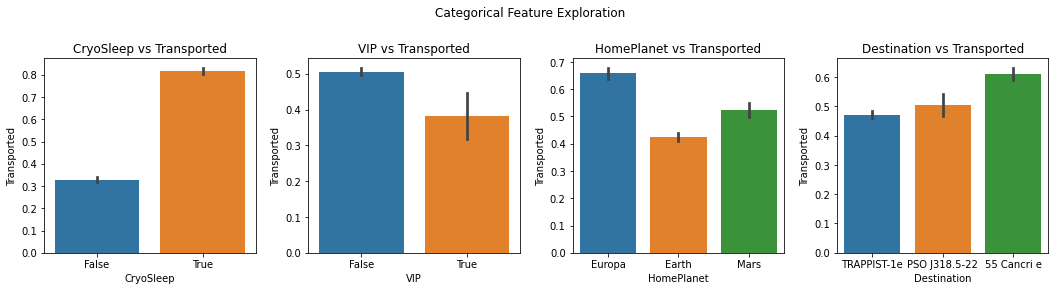

In [123]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)
sns.barplot(x = 'CryoSleep', y = 'Transported', data = df)
plt.title('CryoSleep vs Transported')

plt.subplot(1,4,2)
sns.barplot(x = 'VIP', y = 'Transported', data = df)
plt.title('VIP vs Transported')

plt.subplot(1,4,3) 
sns.barplot(x = 'HomePlanet', y = 'Transported', data = df)
plt.title('HomePlanet vs Transported')

plt.subplot(1,4,4)
sns.barplot(x = 'Destination', y = 'Transported', data = df)
plt.title('Destination vs Transported')

plt.subplots_adjust(top = 0.80, wspace = 0.25)

plt.suptitle('Categorical Feature Exploration')
plt.show()

We know from the dataset description that 'Cabin' takes the form *deck/num/side*, where side can be either P for *Port* or S for *Starboard*.

Hence, in order to explore possible correlations in that area, we need to split the information into three more columns:

In [124]:
# .fillna('NA/NA/NA') ensures that we don't get an error when applying the .split or indexing. 

df['Side'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[2])
df['Number'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[1])
df['Deck'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[0])

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CleanRoomService,Side,Deck,Number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,not_paid,P,B,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,paid,S,F,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,paid,S,A,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,not_paid,S,A,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,paid,S,F,1


In [56]:
# How many passengers in each side?
df.groupby('Side').count()['PassengerId']

Side
NA     199
P     4206
S     4288
Name: PassengerId, dtype: int64

In [57]:
# How many passengers in each deck?
df.groupby('Deck').count()['PassengerId']

Deck
A      256
B      779
C      747
D      478
E      876
F     2794
G     2559
NA     199
T        5
Name: PassengerId, dtype: int64

In [125]:
df['Number'].nunique()

1818

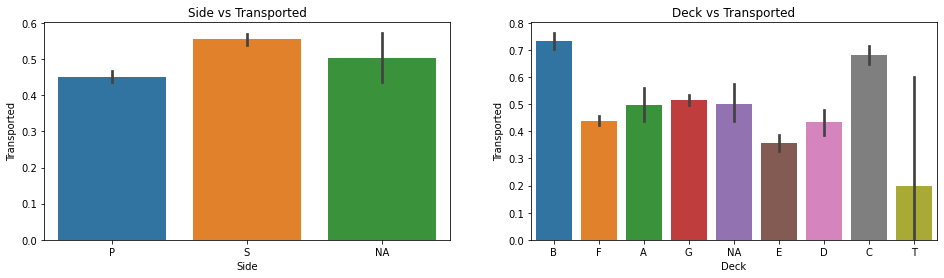

In [128]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.barplot(x = 'Side', y = 'Transported', data = df)
plt.title('Side vs Transported')

plt.subplot(1,2,2)
sns.barplot(x = 'Deck', y = 'Transported', data = df)
plt.title('Deck vs Transported')

plt.show()

<AxesSubplot:xlabel='Deck', ylabel='VIP'>

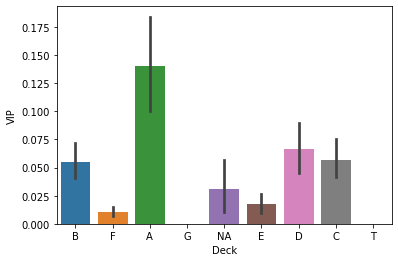

In [81]:
sns.barplot(x = 'Deck', y ='VIP', data = df)

TypeError: 'value' must be an instance of str or bytes, not a float

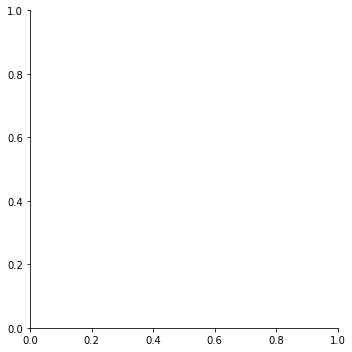

In [84]:
sns.catplot(x = 'Deck', y = 'Destination', data = df)

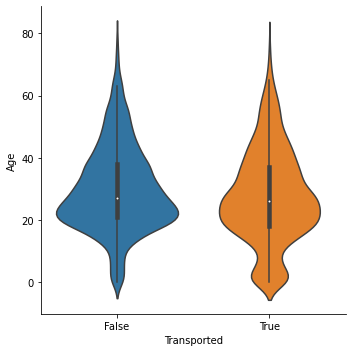

In [7]:
sns.catplot(data = df, y = 'Age', x = 'Transported', kind = 'violin')

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

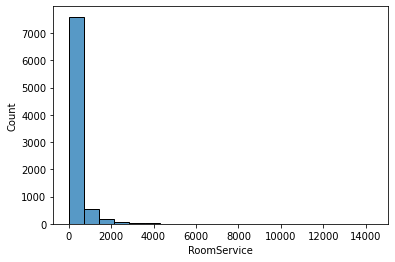

In [8]:
sns.histplot(data = df, x = 'RoomService', bins = 20)

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

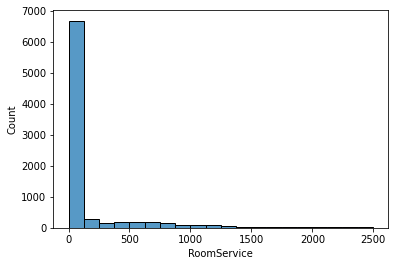

In [9]:
sns.histplot(data = df[df['RoomService'] < 2500], x = 'RoomService', bins = 20)

<AxesSubplot:xlabel='CleanRoomService', ylabel='Transported'>

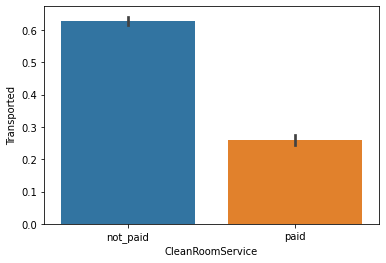

In [10]:
df['CleanRoomService'] = df['RoomService'].apply(lambda x: 'paid' if x > 0 else 'not_paid')
sns.barplot(data = df, x = 'CleanRoomService', y = 'Transported')

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

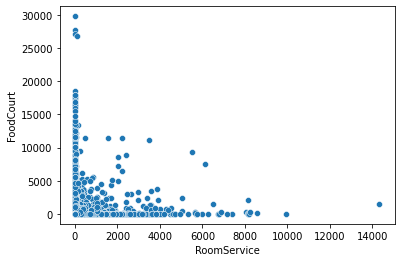

In [106]:
sns.scatterplot(data = df, x = 'RoomService', y = 'FoodCourt')

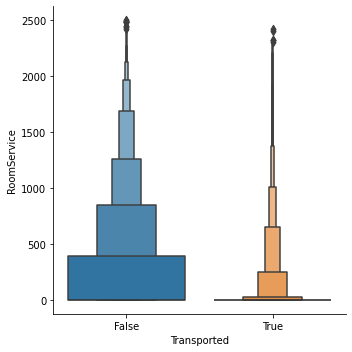

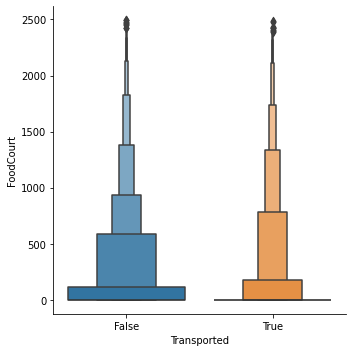

In [98]:
sns.catplot(data = df[df['RoomService'] < 2500], y = 'RoomService', x = 'Transported', kind = 'boxen')
sns.catplot(data = df[df['FoodCourt'] < 2500], y = 'FoodCourt', x = 'Transported', kind = 'boxen')

plt.show()